# Detecting Outliers in the RFMT IHC Data
#### Building Clustering algorithm using KMeans for instance is extremly sensenble to outliers thus, detecting and removing these outliers will result in a good model.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from helperFunctions.outlier_detection import outlier_detection

In [48]:
rfmtihc = pd.read_csv('data/rfmtihc.csv')
rfmtihc.drop('Unnamed: 0', axis=1, inplace=True)
rfmtihc.set_index('key_0', inplace=True)

In [32]:
rfmtihc.describe()

,Recency,Frequency,MonetaryValue,Tenure,A_mean,G_mean,H_mean,I_mean,B_mean
count,55332.000000,55332.000000,55332.000000,55332.000000,55332.000000,55332.000000,55332.000000,55332.000000,55332.000000
mean,175.273097,1.397365,254.436515,201.697752,0.253784,0.249350,0.160083,0.108964,0.116800
std,111.425380,1.373119,346.593552,117.266772,0.349686,0.361218,0.303244,0.232954,0.265793
min,1.000000,1.000000,24.646960,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.000000,1.000000,114.899000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,171.000000,1.000000,167.160000,194.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,1.000000,258.081000,308.000000,0.480074,0.461224,0.170721,0.045917,0.000000
max,391.000000,111.000000,29117.303120,391.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
rfmtihc.head()

,Recency,Frequency,MonetaryValue,Tenure,A_mean,G_mean,H_mean,I_mean,B_mean
key_0,,,,,,,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,146,1,153.840,146,0.302910,0.155305,0.170037,0.0,0.0
0003509d64606735e66a3d32f2a1a084f613ee4b,89,2,245.632,142,0.000000,1.000000,0.000000,0.5,0.0
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,38,2,833.164,275,0.231401,0.280338,0.319150,0.0,0.0
0003f10010cd3dadcb7182ed7b0abf5166393e91,287,1,121.808,287,0.000000,1.000000,0.000000,0.0,0.0
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,28,1,108.720,28,1.000000,0.000000,0.000000,0.0,0.0


Recency Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [18, 362]. Resulting outlier proportion: 0.03687.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [19, 358]. Resulting outlier proportion: 0.0587.


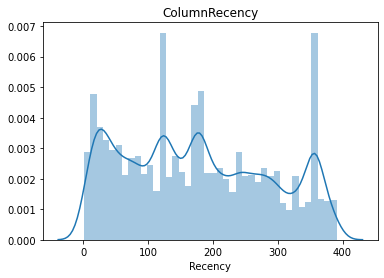

----------------------
Frequency Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 6]. Resulting outlier proportion: 0.01327.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 4]. Resulting outlier proportion: 0.03206.
Outlier detection: Isolation Forest identified outliers outside of the range [1, 2]. Resulting outlier proportion: 0.08702.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [1, 1]. Resulting outlier proportion: 0.16117.


C:\Users\ahmed\anaconda3\envs\h_ams\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


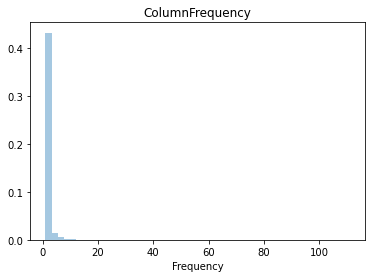

----------------------
MonetaryValue Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [24.65, 1466.18]. Resulting outlier proportion: 0.01261.
Outlier detection: Modified Z-Score identified outliers outside of the range [24.65, 1027.34]. Resulting outlier proportion: 0.02855.
Outlier detection: Isolation Forest identified outliers outside of the range [50.04, 556.95]. Resulting outlier proportion: 0.07986.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [64.31, 394.63]. Resulting outlier proportion: 0.13061.


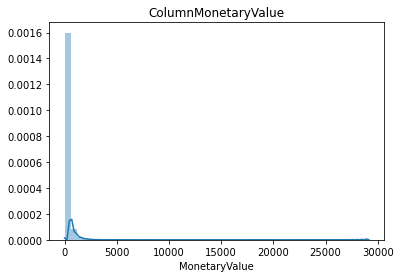

----------------------
Tenure Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [18, 368]. Resulting outlier proportion: 0.05897.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [114, 361]. Resulting outlier proportion: 0.0756.


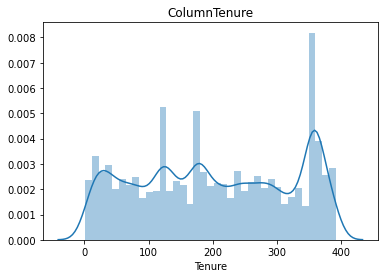

----------------------
A_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.00342.


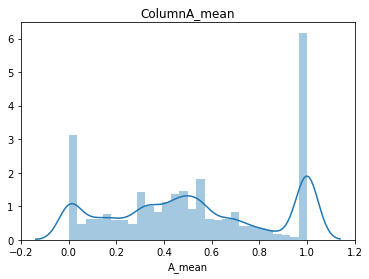

----------------------
G_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.


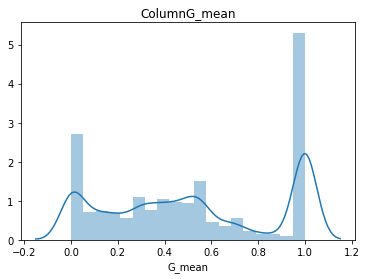

----------------------
H_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.


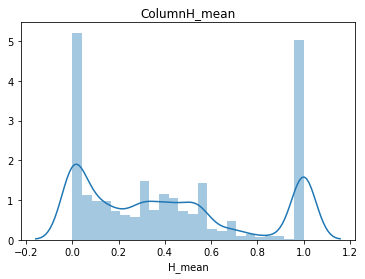

----------------------
I_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.47]. Resulting outlier proportion: 0.25503.


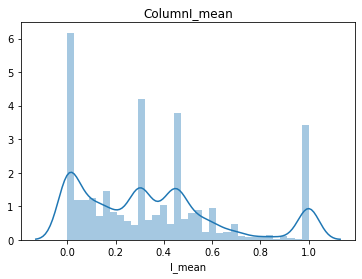

----------------------
B_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.00251.


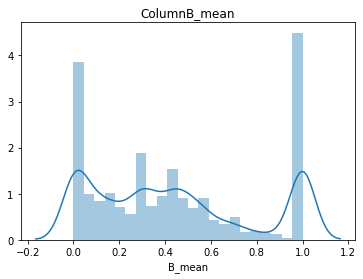

----------------------


In [5]:
for x in rfmtihc.columns:
    print(x + ' Column Outliers:')
    outlier_detection(rfmtihc[x].dropna())
    sns.distplot(rfmtihc[x].dropna())
    plt.title('Column' + x)
    plt.show()
    print('----------------------')

#### By looking visually at these data we see almost 85% of Frequency data are = 1 so it's better to drop this column
#### We also notice that the MonetaryValue also suffer from outliers which has been identied by Modified Z-Score to be outside of the range [24.65, 1027.34]. Resulting outlier proportion: 0.02855.

In [49]:
rfmtihc_clean = rfmtihc[(rfmtihc.MonetaryValue <= 1027.34) & (rfmtihc.MonetaryValue > 24.65)].drop('Frequency', axis=1)
print('Data loss = ' + str(rfmtihc.shape[0] - rfmtihc_clean.shape[0]) + " which is " +
      str(np.round((rfmtihc.shape[0] - rfmtihc_clean.shape[0]) / rfmtihc.shape[0] * 100, 2)) + "%")
rfmtihc_clean.describe().T

Data loss = 1581 which is 2.86%


,count,mean,std,min,25%,50%,75%,max
Recency,53751.0,178.118249,111.076491,1.00000,83.000,173.00,269.000000,391.00
MonetaryValue,53751.0,212.718513,161.261046,24.94088,113.708,163.58,245.780000,1027.34
Tenure,53751.0,197.663095,116.117253,1.00000,102.000,188.00,301.000000,391.00
A_mean,53751.0,0.247917,0.349569,0.00000,0.000,0.00,0.473228,1.00
G_mean,53751.0,0.248176,0.362732,0.00000,0.000,0.00,0.458626,1.00
H_mean,53751.0,0.159429,0.304614,0.00000,0.000,0.00,0.159849,1.00
I_mean,53751.0,0.108294,0.234280,0.00000,0.000,0.00,0.022531,1.00
B_mean,53751.0,0.113523,0.265070,0.00000,0.000,0.00,0.000000,1.00


In [50]:
rfmtihc_clean.head()

,Recency,MonetaryValue,Tenure,A_mean,G_mean,H_mean,I_mean,B_mean
key_0,,,,,,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,146,153.840,146,0.302910,0.155305,0.170037,0.0,0.0
0003509d64606735e66a3d32f2a1a084f613ee4b,89,245.632,142,0.000000,1.000000,0.000000,0.5,0.0
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,38,833.164,275,0.231401,0.280338,0.319150,0.0,0.0
0003f10010cd3dadcb7182ed7b0abf5166393e91,287,121.808,287,0.000000,1.000000,0.000000,0.0,0.0
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,28,108.720,28,1.000000,0.000000,0.000000,0.0,0.0


Recency Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [17, 362]. Resulting outlier proportion: 0.03788.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [19, 354]. Resulting outlier proportion: 0.08363.


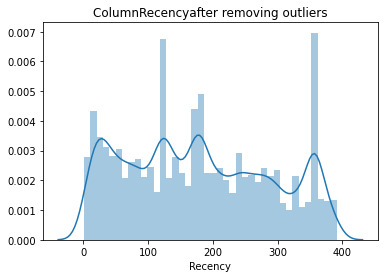

----------------------
MonetaryValue Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [24.94, 777.11]. Resulting outlier proportion: 0.01857.
Outlier detection: Modified Z-Score identified outliers outside of the range [24.94, 735.09]. Resulting outlier proportion: 0.02324.
Outlier detection: Isolation Forest identified outliers outside of the range [53.76, 446.77]. Resulting outlier proportion: 0.08316.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [69.4, 310.83]. Resulting outlier proportion: 0.16188.


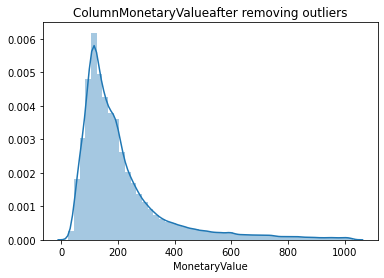

----------------------
Tenure Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [18, 366]. Resulting outlier proportion: 0.05514.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [96, 361]. Resulting outlier proportion: 0.06699.


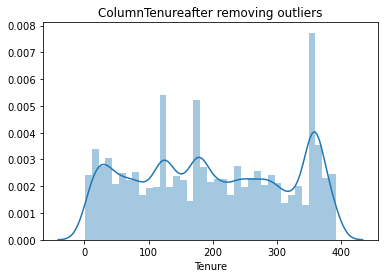

----------------------
A_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.43318.


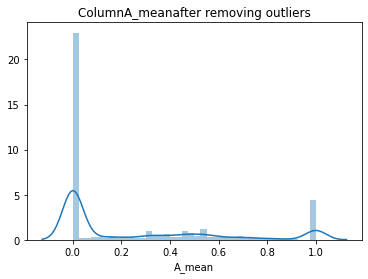

----------------------
G_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.41901.


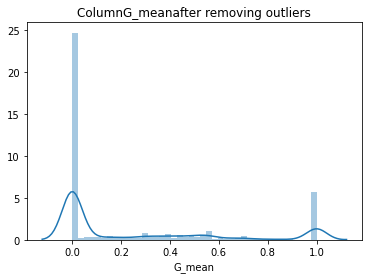

----------------------
H_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.31333.


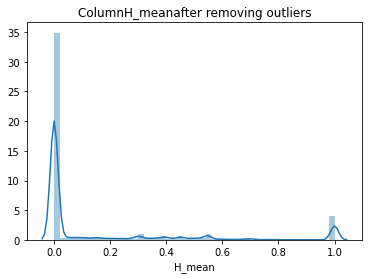

----------------------
I_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 0.93]. Resulting outlier proportion: 0.0328.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 0.85]. Resulting outlier proportion: 0.03447.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 0.52]. Resulting outlier proportion: 0.06973.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.45]. Resulting outlier proportion: 0.09691.


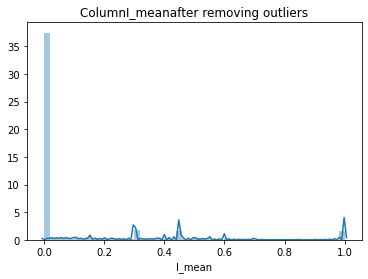

----------------------
B_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 0.94]. Resulting outlier proportion: 0.05505.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.21849.


C:\Users\ahmed\anaconda3\envs\h_ams\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


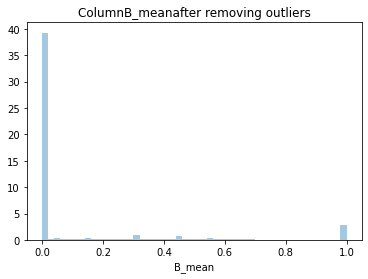

----------------------


In [8]:
for x in rfmtihc_clean.columns:
    print(x + ' Column Outliers:')
    outlier_detection(rfmtihc_clean[x].dropna())
    sns.distplot(rfmtihc_clean[x].dropna())
    plt.title('Column' + x + 'after removing outliers')
    plt.show()
    print('----------------------')

Recency Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [17, 362]. Resulting outlier proportion: 0.03788.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [19, 354]. Resulting outlier proportion: 0.08363.


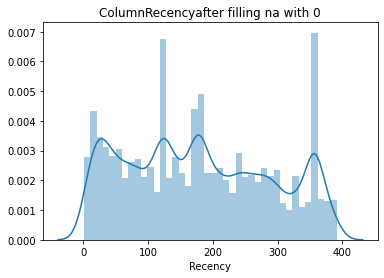

----------------------
MonetaryValue Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [24.94, 777.11]. Resulting outlier proportion: 0.01857.
Outlier detection: Modified Z-Score identified outliers outside of the range [24.94, 735.09]. Resulting outlier proportion: 0.02324.
Outlier detection: Isolation Forest identified outliers outside of the range [53.76, 446.77]. Resulting outlier proportion: 0.08316.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [69.4, 310.83]. Resulting outlier proportion: 0.16188.


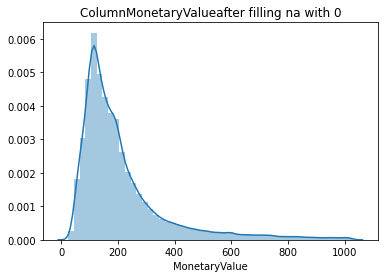

----------------------
Tenure Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [18, 366]. Resulting outlier proportion: 0.05514.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [96, 361]. Resulting outlier proportion: 0.06699.


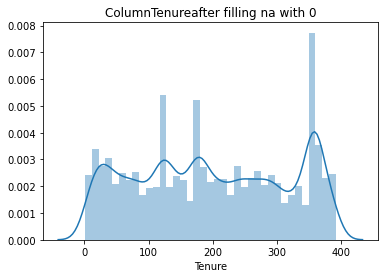

----------------------
A_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.43318.


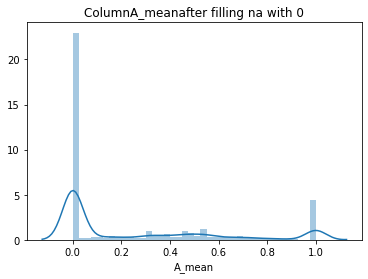

----------------------
G_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.41901.


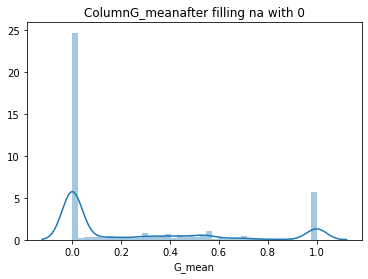

----------------------
H_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.31333.


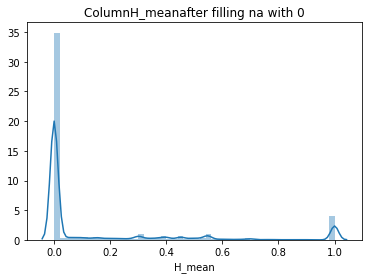

----------------------
I_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 0.93]. Resulting outlier proportion: 0.0328.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 0.85]. Resulting outlier proportion: 0.03447.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 0.52]. Resulting outlier proportion: 0.06973.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.45]. Resulting outlier proportion: 0.09691.


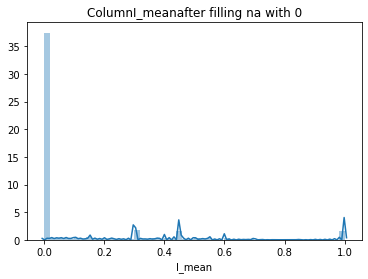

----------------------
B_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 0.94]. Resulting outlier proportion: 0.05505.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.21849.


C:\Users\ahmed\anaconda3\envs\h_ams\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


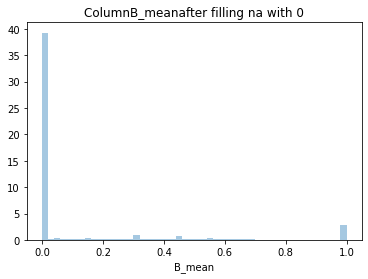

----------------------


In [7]:
for x in rfmtihc_clean.columns:
    print(x + ' Column Outliers:')
    outlier_detection(rfmtihc_clean[x].fillna(0))
    sns.distplot(rfmtihc_clean[x].fillna(0))
    plt.title('Column' + x + 'after filling na with 0')
    plt.show()
    print('----------------------')

Recency Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [17, 362]. Resulting outlier proportion: 0.03788.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [19, 354]. Resulting outlier proportion: 0.08363.


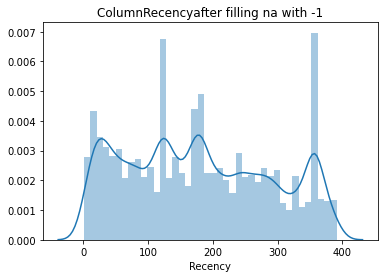

----------------------
MonetaryValue Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [24.94, 777.11]. Resulting outlier proportion: 0.01857.
Outlier detection: Modified Z-Score identified outliers outside of the range [24.94, 735.09]. Resulting outlier proportion: 0.02324.
Outlier detection: Isolation Forest identified outliers outside of the range [53.76, 446.77]. Resulting outlier proportion: 0.08316.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [69.4, 310.83]. Resulting outlier proportion: 0.16188.


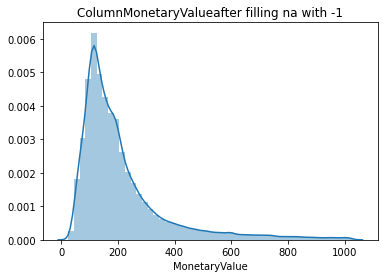

----------------------
Tenure Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [18, 366]. Resulting outlier proportion: 0.05514.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [96, 361]. Resulting outlier proportion: 0.06699.


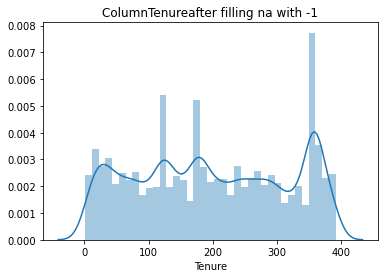

----------------------
A_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [-1.0, 0.55]. Resulting outlier proportion: 0.18837.


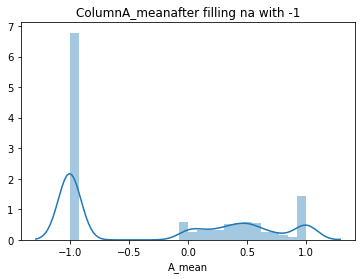

----------------------
G_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [-1.0, 0.55]. Resulting outlier proportion: 0.18749.


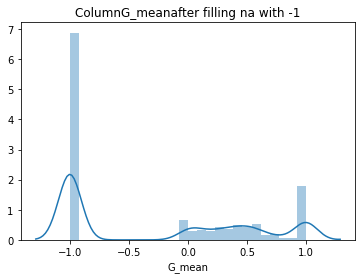

----------------------
H_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [-1.0, 0.0]. Resulting outlier proportion: 0.31456.


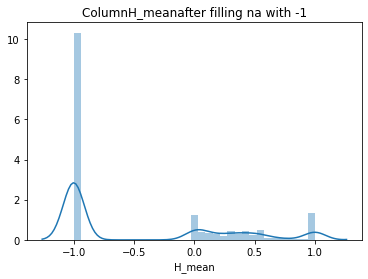

----------------------
I_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [-1.0, 0.55]. Resulting outlier proportion: 0.06033.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [-1.0, 0.45]. Resulting outlier proportion: 0.08629.


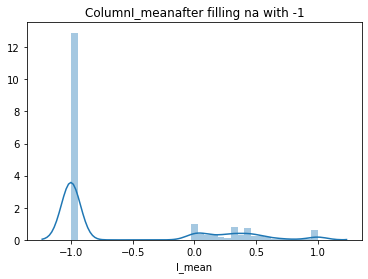

----------------------
B_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [-1.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [-1.0, -1.0]. Resulting outlier proportion: 0.25304.


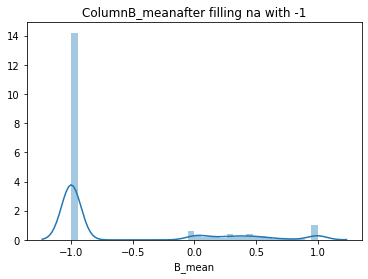

----------------------


In [8]:
for x in rfmtihc_clean.columns:
    print(x + ' Column Outliers:')
    outlier_detection(rfmtihc_clean[x].fillna(-1))
    sns.distplot(rfmtihc_clean[x].fillna(-1))
    plt.title('Column' + x + 'after filling na with -1')
    plt.show()
    print('----------------------')

Recency Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [17, 362]. Resulting outlier proportion: 0.03788.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [19, 354]. Resulting outlier proportion: 0.08363.


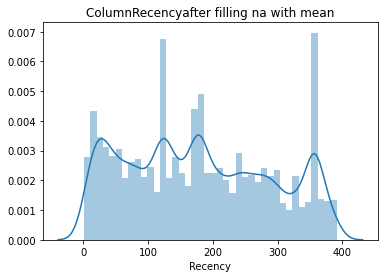

----------------------
MonetaryValue Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [24.94, 777.11]. Resulting outlier proportion: 0.01857.
Outlier detection: Modified Z-Score identified outliers outside of the range [24.94, 735.09]. Resulting outlier proportion: 0.02324.
Outlier detection: Isolation Forest identified outliers outside of the range [53.76, 446.77]. Resulting outlier proportion: 0.08316.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [69.4, 310.83]. Resulting outlier proportion: 0.16188.


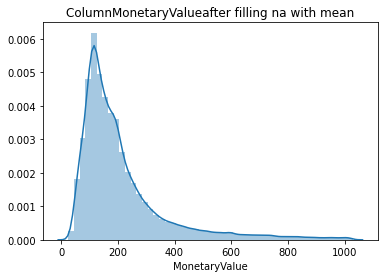

----------------------
Tenure Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [18, 366]. Resulting outlier proportion: 0.05514.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [96, 361]. Resulting outlier proportion: 0.06699.


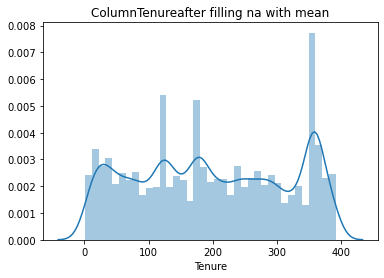

----------------------
A_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.5, 0.55]. Resulting outlier proportion: 0.18973.


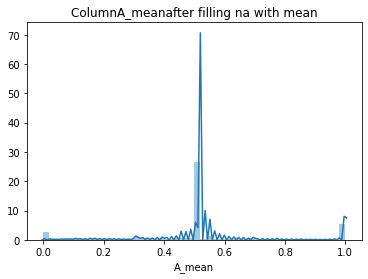

----------------------
G_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.51, 0.55]. Resulting outlier proportion: 0.18748.


C:\Users\ahmed\anaconda3\envs\h_ams\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


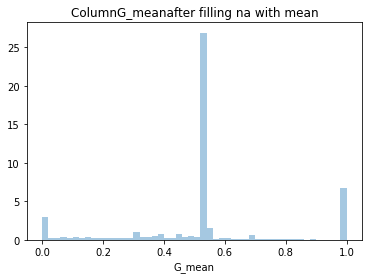

----------------------
H_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.45]. Resulting outlier proportion: 0.16173.


C:\Users\ahmed\anaconda3\envs\h_ams\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


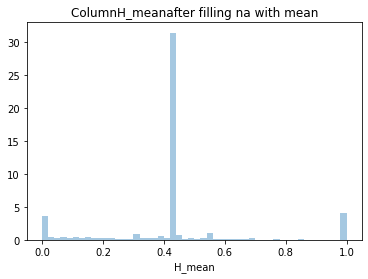

----------------------
I_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 0.94]. Resulting outlier proportion: 0.03254.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 0.74]. Resulting outlier proportion: 0.03821.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 0.53]. Resulting outlier proportion: 0.06699.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.3, 0.38]. Resulting outlier proportion: 0.1299.


C:\Users\ahmed\anaconda3\envs\h_ams\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


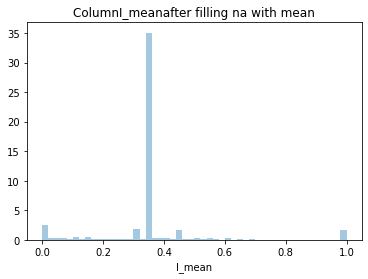

----------------------
B_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.05, 0.84]. Resulting outlier proportion: 0.05749.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.43, 0.46]. Resulting outlier proportion: 0.10381.


C:\Users\ahmed\anaconda3\envs\h_ams\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


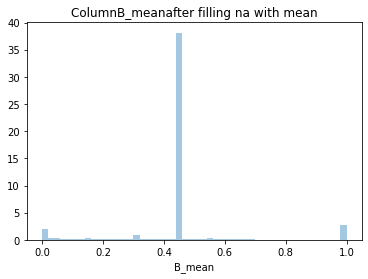

----------------------


In [9]:
for x in rfmtihc_clean.columns:
    print(x + ' Column Outliers:')
    outlier_detection(rfmtihc_clean[x].fillna(rfmtihc_clean[x].mean()))
    sns.distplot(rfmtihc_clean[x].fillna(rfmtihc_clean[x].mean()))
    plt.title('Column' + x + 'after filling na with mean')
    plt.show()
    print('----------------------')

Recency Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [17, 362]. Resulting outlier proportion: 0.03788.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [19, 354]. Resulting outlier proportion: 0.08363.


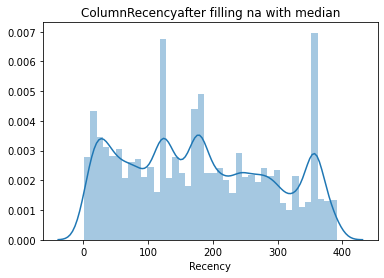

----------------------
MonetaryValue Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [24.94, 777.11]. Resulting outlier proportion: 0.01857.
Outlier detection: Modified Z-Score identified outliers outside of the range [24.94, 735.09]. Resulting outlier proportion: 0.02324.
Outlier detection: Isolation Forest identified outliers outside of the range [53.76, 446.77]. Resulting outlier proportion: 0.08316.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [69.4, 310.83]. Resulting outlier proportion: 0.16188.


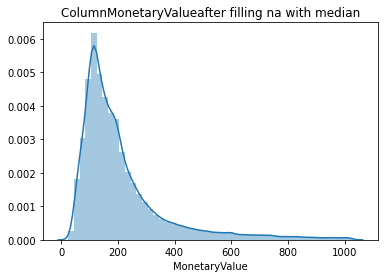

----------------------
Tenure Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [1, 391]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [18, 366]. Resulting outlier proportion: 0.05514.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [96, 361]. Resulting outlier proportion: 0.06699.


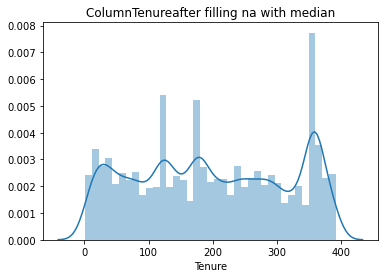

----------------------
A_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.43318.


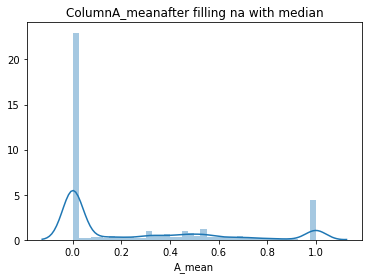

----------------------
G_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.41901.


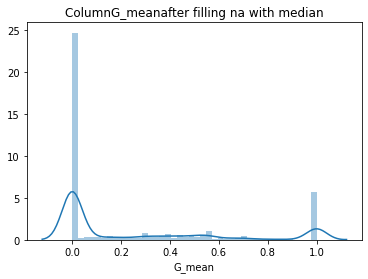

----------------------
H_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.31333.


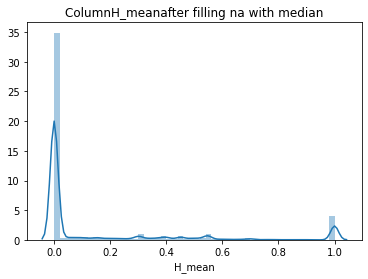

----------------------
I_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 0.93]. Resulting outlier proportion: 0.0328.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 0.85]. Resulting outlier proportion: 0.03447.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 0.52]. Resulting outlier proportion: 0.06973.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.45]. Resulting outlier proportion: 0.09691.


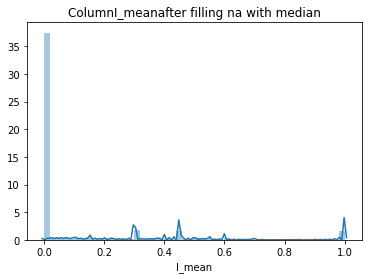

----------------------
B_mean Column Outliers:
Outlier detection: Z-Score identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Modified Z-Score identified outliers outside of the range [0.0, 0.94]. Resulting outlier proportion: 0.05505.
Outlier detection: Isolation Forest identified outliers outside of the range [0.0, 1.0]. Resulting outlier proportion: 0.0.
Outlier detection: Isolation Forest (new version) identified outliers outside of the range [0.0, 0.0]. Resulting outlier proportion: 0.21849.


C:\Users\ahmed\anaconda3\envs\h_ams\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


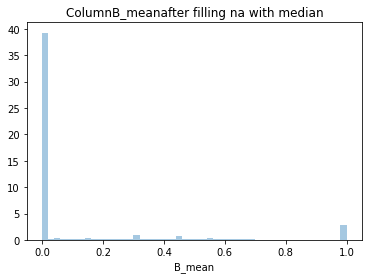

----------------------


In [9]:
for x in rfmtihc_clean.columns:
    print(x + ' Column Outliers:')
    outlier_detection(rfmtihc_clean[x].fillna(rfmtihc_clean[x].median()))
    sns.distplot(rfmtihc_clean[x].fillna(rfmtihc_clean[x].median()))
    plt.title('Column' + x + 'after filling na with median')
    plt.show()
    print('----------------------')

In [51]:
bb = rfmtihc_clean.fillna(0)

In [39]:
bb.head()

,Recency,MonetaryValue,Tenure,A_mean,G_mean,H_mean,I_mean,B_mean
key_0,,,,,,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,146,153.840,146,0.302910,0.155305,0.170037,0.0,0.0
0003509d64606735e66a3d32f2a1a084f613ee4b,89,245.632,142,0.000000,1.000000,0.000000,0.5,0.0
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,38,833.164,275,0.231401,0.280338,0.319150,0.0,0.0
0003f10010cd3dadcb7182ed7b0abf5166393e91,287,121.808,287,0.000000,1.000000,0.000000,0.0,0.0
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,28,108.720,28,1.000000,0.000000,0.000000,0.0,0.0


In [52]:
from sklearn.preprocessing import PowerTransformer
# logTransformer = FunctionTransformer(np.log, validate=True)
cc = PowerTransformer().fit_transform(bb)
# cc = StandardScaler().fit_transform(bb)
cc = pd.DataFrame(cc, columns=bb.columns, index=bb.index)

In [53]:
cc.describe().round(2)

,Recency,MonetaryValue,Tenure,A_mean,G_mean,H_mean,I_mean,B_mean
count,53751.00,53751.00,53751.00,53751.00,53751.00,53751.00,53751.00,53751.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.15,-4.05,-2.11,-0.81,-0.79,-0.63,-0.57,-0.51
25%,-0.77,-0.66,-0.74,-0.81,-0.79,-0.63,-0.57,-0.51
50%,0.10,-0.01,0.03,-0.81,-0.79,-0.63,-0.57,-0.51
75%,0.84,0.64,0.89,1.13,1.14,0.96,-0.05,-0.51
max,1.64,2.44,1.50,1.58,1.59,1.85,1.98,2.12


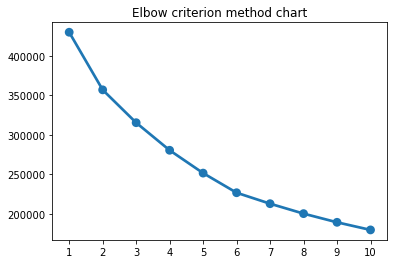

In [54]:
# Determine the optimal number of clusters
# Create empty sse dictionary
sse = {}

# Fit KMeans algorithm on k values between 1 and 11
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333, n_jobs=-1)
    kmeans.fit(cc)
    sse[k] = kmeans.inertia_

# Add the title to the plot
plt.title('Elbow criterion method chart')

# Create and display a scatter plot
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

         Recency  MonetaryValue  Tenure  A_mean  G_mean  H_mean  I_mean  \
segment                                                                   
0            0.0           -0.0     0.0    -0.0    -0.0     2.0    -1.0   
1            0.0            0.0     0.0    -0.0    -0.0     0.0     2.0   
2           -0.0            0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
3           -1.0           -0.0    -1.0    -0.0     0.0    -0.0    -0.0   
4            1.0           -0.0     0.0    -1.0     1.0    -1.0    -1.0   
5            0.0            0.0     0.0     1.0    -0.0    -1.0    -1.0   

         B_mean  
segment          
0          -0.0  
1          -0.0  
2           2.0  
3          -0.0  
4          -0.0  
5          -0.0  


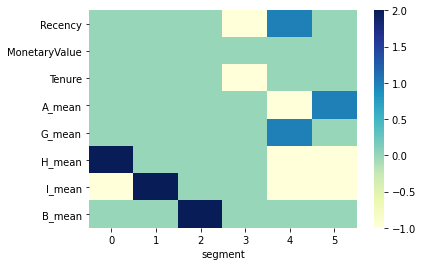

In [55]:
# Initialize `KMeans` with 6 clusters
kmeans=KMeans(n_clusters=6, random_state=123, n_jobs=-1)

# Fit the model on the pre-processed dataset
kmeans.fit(cc)

# Assign the generated labels to a new column
cc_kmeans6 = cc.assign(segment = kmeans.labels_)

# K-means segmentation averages
# Group by the segment label and calculate average column values
kmeans6_averages = cc_kmeans6.groupby(['segment']).mean().round(0)

# Print the average column values per each segment
print(kmeans6_averages)

# Create a heatmap on the average column values per each segment
sns.heatmap(kmeans6_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()

         Recency  MonetaryValue  Tenure  A_mean  G_mean  H_mean  I_mean  \
segment                                                                   
0            1.0           -0.0     0.0    -0.0    -0.0     2.0    -1.0   
1            0.0            0.0     0.0     1.0    -0.0    -1.0    -1.0   
2           -1.0           -0.0    -1.0    -0.0     0.0    -0.0    -0.0   
3            0.0           -0.0     0.0    -0.0    -0.0    -0.0     2.0   
4            1.0           -0.0     0.0    -1.0     1.0    -1.0    -1.0   
5           -0.0           -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
6           -0.0            2.0     1.0     1.0     0.0     0.0     1.0   

         B_mean  
segment          
0          -0.0  
1          -0.0  
2          -0.0  
3          -0.0  
4          -0.0  
5           2.0  
6           1.0  


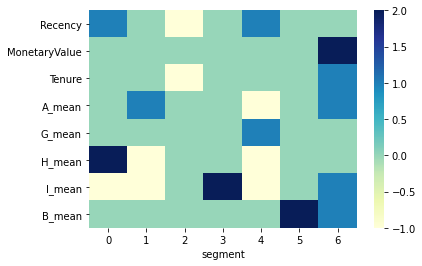

In [56]:
# Initialize `KMeans` with 6 clusters
kmeans=KMeans(n_clusters=7, random_state=123, n_jobs=-1)

# Fit the model on the pre-processed dataset
kmeans.fit(cc)

# Assign the generated labels to a new column
cc_kmeans6 = cc.assign(segment = kmeans.labels_)

# K-means segmentation averages
# Group by the segment label and calculate average column values
kmeans6_averages = cc_kmeans6.groupby(['segment']).mean().round(0)

# Print the average column values per each segment
print(kmeans6_averages)

# Create a heatmap on the average column values per each segment
sns.heatmap(kmeans6_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()

In [14]:
def show_clusters_hmap(df, km_labels, k):
    # Assign the generated labels to a new column
    df_kmeans = df.assign(segment=km_labels[k])
    # K-means segmentation averages
    # Group by the segment label and calculate average column values
    kmeans_averages = df_kmeans.groupby(['segment']).mean().round(0)
    # Print the average column values per each segment
    print(kmeans_averages)
    # Heatmap based on the average column values per each segment
    sns.heatmap(kmeans_averages.T, cmap='YlGnBu')
    plt.title("Average Column Values per each of " + str(k) + " Segment or Clusters")
    plt.savefig("visualizations/kmeans_clusters_" + str(k) + ".png", dpi=1200)
    plt.show()

Recency Showing dist plots of data after scaling:


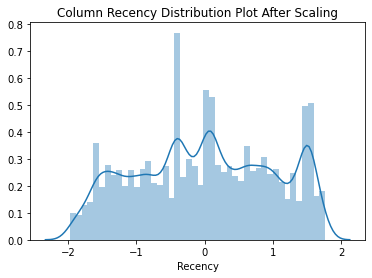

----------------------
MonetaryValue Showing dist plots of data after scaling:


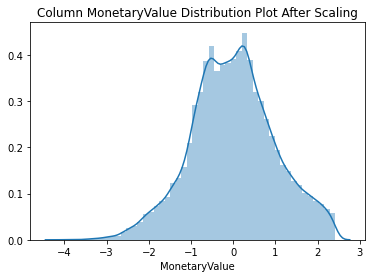

----------------------
Tenure Showing dist plots of data after scaling:


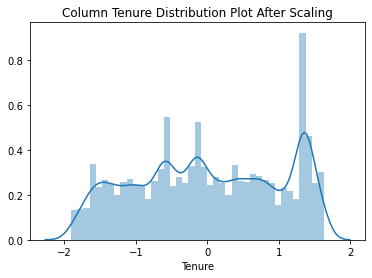

----------------------
A_mean Showing dist plots of data after scaling:


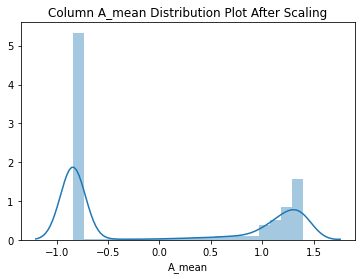

----------------------
G_mean Showing dist plots of data after scaling:


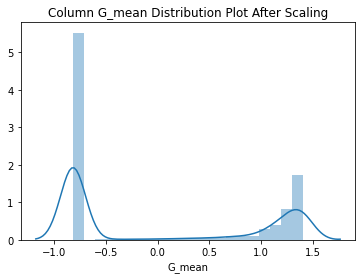

----------------------
H_mean Showing dist plots of data after scaling:


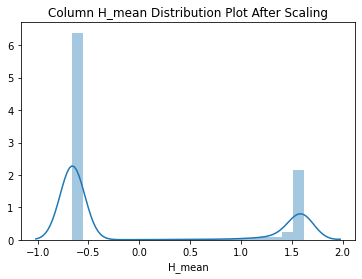

----------------------
I_mean Showing dist plots of data after scaling:


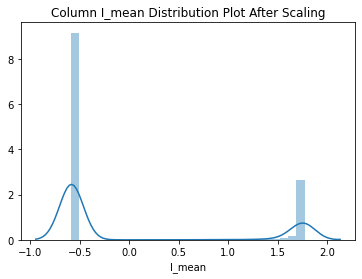

----------------------
B_mean Showing dist plots of data after scaling:


C:\Users\ahmed\anaconda3\envs\h_ams\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


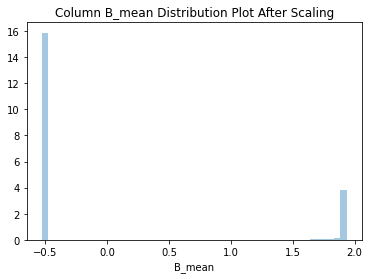

----------------------


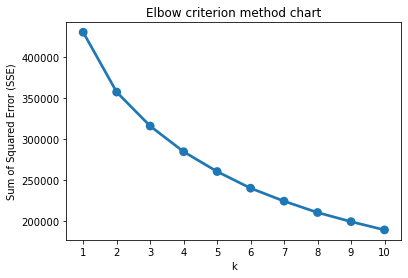

In [17]:
from helperFunctions.clustering import *
sse, clusters_labels = create_kmeans_clusters(cc)
plot_clusters(sse)

         Recency  MonetaryValue  Tenure  A_mean  G_mean  H_mean  I_mean  \
segment                                                                   
0           -1.0           -0.0    -1.0    -0.0     0.0    -0.0    -0.0   
1           -0.0            0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
2            0.0            0.0     0.0     1.0    -0.0    -1.0    -1.0   
3            0.0            0.0     0.0    -0.0    -0.0     0.0     2.0   
4            0.0           -0.0     0.0    -0.0    -0.0     2.0    -1.0   
5            1.0           -0.0     0.0    -1.0     1.0    -1.0    -1.0   

         B_mean  
segment          
0          -0.0  
1           2.0  
2          -0.0  
3          -0.0  
4          -0.0  
5          -0.0  


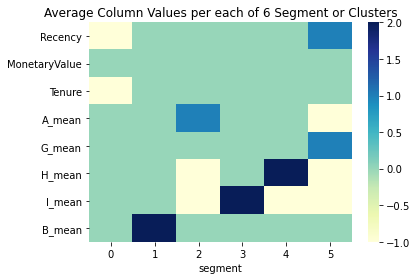

In [68]:
show_clusters_hmap(cc, clusters_labels, 6)

         Recency  MonetaryValue  Tenure  A_mean  G_mean  H_mean  I_mean  \
segment                                                                   
0            1.0            0.0     0.0     1.0    -0.0    -1.0    -1.0   
1            1.0           -0.0     0.0    -1.0     1.0    -1.0    -1.0   
2            1.0           -0.0     0.0    -0.0    -0.0     2.0    -1.0   
3           -1.0           -0.0    -1.0    -0.0     0.0    -0.0    -0.0   
4           -0.0           -0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
5            0.0           -0.0     0.0    -0.0    -0.0    -0.0     2.0   
6           -0.0            2.0     1.0     1.0     0.0     0.0     1.0   

         B_mean  
segment          
0          -0.0  
1          -0.0  
2          -0.0  
3          -0.0  
4           2.0  
5          -0.0  
6           1.0  


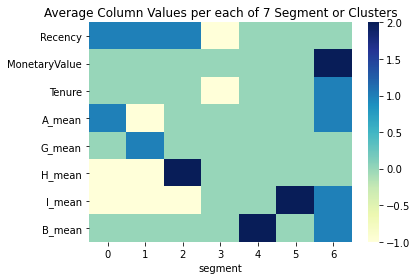

In [67]:
show_clusters_hmap(cc, clusters_labels, 7)

In [14]:
# Plot Dendrogram Function
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

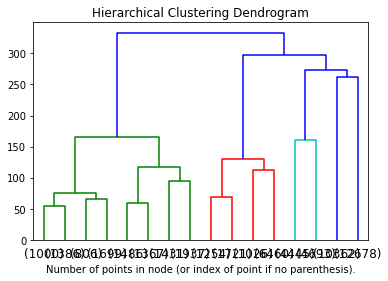

In [16]:
X = cc

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.xticks(rotation=90)
plt.show()

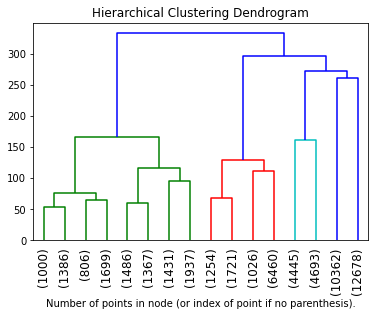

In [18]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [49]:
# Fit a histogram model with 4 clusters as observed from above RMT_IFC denrogram.
# The highest distance as appears in 4 clusters
model2 = AgglomerativeClustering(n_clusters=4)
model2 = model2.fit(X)

         Recency  MonetaryValue  Tenure  A_mean  G_mean  H_mean  I_mean  \
segment                                                                   
0            0.0           -0.0    -0.0     0.0     0.0    -1.0    -1.0   
1           -0.0            0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
2            0.0            0.0     0.0    -0.0    -0.0     0.0     2.0   
3            0.0           -0.0     0.0    -0.0    -0.0     2.0    -1.0   

         B_mean  
segment          
0          -1.0  
1           2.0  
2          -0.0  
3          -1.0  


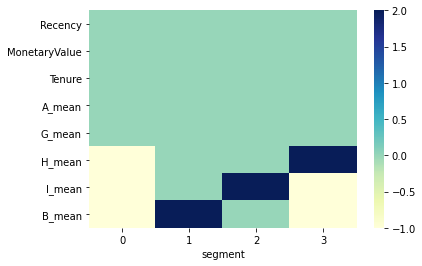

In [54]:
# Assign the generated labels to a new column
cc_h4 = cc.assign(segment = model2.labels_)
# K-means segmentation averages
# Group by the segment label and calculate average column values
h4_averages = cc_h4.groupby(['segment']).mean().round(0)

# Print the average column values per each segment
print(h4_averages)

# Create a heatmap on the average column values per each segment
sns.heatmap(h4_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()

Text(0.5, 0, 'PCA features')

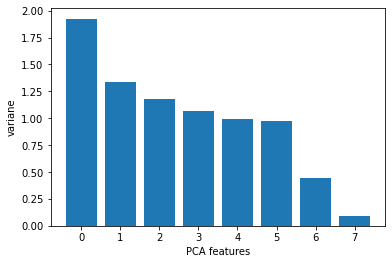

In [71]:
# Get the minimum number of features in case of features reduction - it appears to be 5 features
pcaModel = PCA()
trans = pcaModel.fit_transform(cc)
feature = range(pcaModel.n_components_)
plt.bar(feature, pcaModel.explained_variance_)
plt.xticks(feature)
plt.ylabel('variane')
plt.xlabel('PCA features')

In [103]:
# Calculate monthly spend per customer
monthly_revenue = cc.groupby([cc.index,'InvoiceMonth'])['TotalSum'].sum().mean()
# Calculate average monthly spend
monthly_revenue = np.mean(monthly_revenue)
# Define lifespan to 36 months
lifespan_months = 36
# Calculate basic CLV
clv_basic = monthly_revenue * lifespan_months
# Print basic CLV value
print('Average basic CLV is {:.1f} USD'.format(clv_basic))

,Recency,MonetaryValue,Tenure,A_mean,G_mean,H_mean,I_mean,B_mean
key_0,,,,,,,,
00003ce67d6b73b2d49f4036f60cb73385a9c96e,-0.137750,-0.118864,-0.330206,0.759263,0.268354,1.013566,-0.565405,-0.512574
0003509d64606735e66a3d32f2a1a084f613ee4b,-0.699711,0.634370,-0.365783,-0.814316,1.586806,-0.631046,1.939427,-0.512574
00035f943a8a8e176fdd5a44059b38dcc0c73f5a,-1.343725,2.218321,0.698069,0.531348,0.744966,1.492508,-0.565405,-0.512574
0003f10010cd3dadcb7182ed7b0abf5166393e91,0.963539,-0.529916,0.785071,-0.814316,1.586806,-0.631046,-0.565405,-0.512574
0003fc733e4ff3bfb295f2c10c7077fb0763ebcc,-1.503822,-0.739065,-1.599073,1.583764,-0.788690,-0.631046,-0.565405,-0.512574
...,...,...,...,...,...,...,...,...
fffb0fc0e6cde8d4838713679c0a6d3c28087671,-0.489935,-0.948431,-0.672204,-0.814316,1.586806,-0.631046,-0.565405,-0.512574
fffc3a37495e0f44dbfe4511ec0d46460aa571e5,-0.146776,-0.183640,-0.339072,-0.814316,0.959024,1.525390,1.801782,-0.512574
fffc95150d63e98e62d98cdfabbf13245fdc2dd2,-0.449834,0.398135,-0.633690,1.583764,-0.788690,-0.631046,-0.565405,-0.512574


In [90]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53751 entries, 0 to 53750
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key_0          53751 non-null  object 
 1   Recency        53751 non-null  float64
 2   MonetaryValue  53751 non-null  float64
 3   Tenure         53751 non-null  float64
 4   A_mean         53751 non-null  float64
 5   G_mean         53751 non-null  float64
 6   H_mean         53751 non-null  float64
 7   I_mean         53751 non-null  float64
 8   B_mean         53751 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.7+ MB


In [98]:
cc.rename(columns={'key_0':'User_ID'}

SyntaxError: unexpected EOF while parsing (<ipython-input-98-56dcee0abb3d>, line 1)

In [ ]:

monthly_revenue = cc.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()
# Calculate average monthly spend
monthly_revenue = np.mean(monthly_revenue)
# Define lifespan to 36 months
lifespan_months = 36
# Calculate basic CLV
clv_basic = monthly_revenue * lifespan_months
# Print basic CLV value
print('Average basic CLV is {:.1f} USD'.format(clv_basic))

In [57]:
# Clustering
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def view_data_scaled(df):
    dftemp = PowerTransformer().fit_transform(df)
    dftemp = pd.DataFrame(dftemp, columns=df.columns, index=df.index)
    for x in df.columns:
        print(x + ' Showing dist plots of data after scaling:')
        sns.distplot(dftemp[x])
        plt.title('Column ' + x + ' Distribution Plot After Scaling')
        plt.savefig("visualizations/" + x + "_Distribution_Plot_after_scale.png", dpi=600)
        plt.show()
        print('----------------------')


# Determine the optimal number of clusters
# Create empty sse, and labels dictionary
sse = {}
km_labels = {}


# Fit KMeans algorithm on k values between 1 and predifiened number of clusters
def create_kmeans_clusters(df, n_clust=11):
    # view_data_scaled(df)
    for k in range(1, n_clust):
        pow_trans = PowerTransformer()
        kmeans_c = KMeans(n_clusters=k, n_jobs=-1, random_state=9456)
        steps = [('power_transformation', pow_trans), ('kmeans_clustering', kmeans_c)]
        pipeline = Pipeline(steps=steps)
        pipeline.fit(df)
        sse[k] = pipeline.steps[1][1].inertia_
        km_labels[k] = pipeline.steps[1][1].labels_

    return sse, km_labels


# Plot Sum of Squared Error (SSE) of the generated clusters
def plot_clusters(sse):
    plt.title('Elbow criterion method chart')
    sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
    plt.xlabel("k")
    plt.ylabel("Sum of Squared Error (SSE)")
    plt.savefig("visualizations/kmeans_clusters_sse.png", dpi=600)
    plt.show()

# Visualize clusters in a heatmap and print the average values
def show_clusters_hmap(df, km_labels, k):
    # Assign the generated labels to a new column
    df_kmeans = df.assign(segment=km_labels[k])
    # K-means segmentation averages
    # Group by the segment label and calculate average column values
    kmeans_averages = df_kmeans.groupby(['segment']).mean().round(0)
    # Print the average column values per each segment
    # Heatmap based on the average column values per each segment
    sns.heatmap(kmeans_averages.T, cmap='YlGnBu')
    print(kmeans_averages)
    plt.title("Average Column Values per each of " + str(k) + " Segment or Clusters")
    plt.tight_layout()
    plt.savefig("visualizations/kmeans_clusters_" + str(k) + ".png", dpi=1200)
    plt.show()

In [59]:
sse, gpp = create_kmeans_clusters(bb)

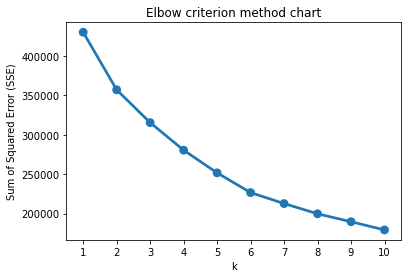

In [60]:
plot_clusters(sse)

In [62]:
# Visualize clusters in a heatmap and print the average values
def vch(df, k):
    
    pow_trans = PowerTransformer()
    kmeans_c = KMeans(n_clusters=k, n_jobs=-1, random_state=9456)
    steps = [('power_transformation', pow_trans), ('kmeans_clustering', kmeans_c)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(df)
    sse = pipeline.steps[1][1].inertia_
    km_labels = pipeline.steps[1][1].labels_
    # Assign the generated labels to a new column
    df_kmeans = df.assign(segment=km_labels)
    # K-means segmentation averages
    # Group by the segment label and calculate average column values
    kmeans_averages = df_kmeans.groupby(['segment']).mean().round(0)
    # Print the average column values per each segment
    # Heatmap based on the average column values per each segment
    sns.heatmap(kmeans_averages.T, cmap='YlGnBu')
    print(kmeans_averages)
    plt.title("Average Column Values per each of " + str(k) + " Segment or Clusters")
    plt.tight_layout()
    plt.savefig("visualizations/kmeans_clusters_" + str(k) + ".png", dpi=1200)
    plt.show()

         Recency  MonetaryValue  Tenure  A_mean  G_mean  H_mean  I_mean  \
segment                                                                   
0           46.0          169.0    47.0     0.0     0.0     0.0     0.0   
1          143.0          264.0   185.0     0.0     0.0     0.0     0.0   
2          223.0          228.0   243.0     1.0     0.0     0.0     0.0   
3          215.0          232.0   244.0     0.0     0.0     0.0     0.0   
4          230.0          212.0   251.0     0.0     0.0     1.0     0.0   
5          235.0          174.0   241.0     0.0     1.0     0.0     0.0   

         B_mean  
segment          
0           0.0  
1           1.0  
2           0.0  
3           0.0  
4           0.0  
5           0.0  


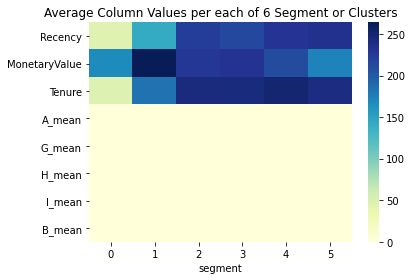

In [63]:
vch(bb, 6)